In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("diabetes.csv")

## EDA

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.shape

(768, 9)

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [9]:
corr = df.corr()

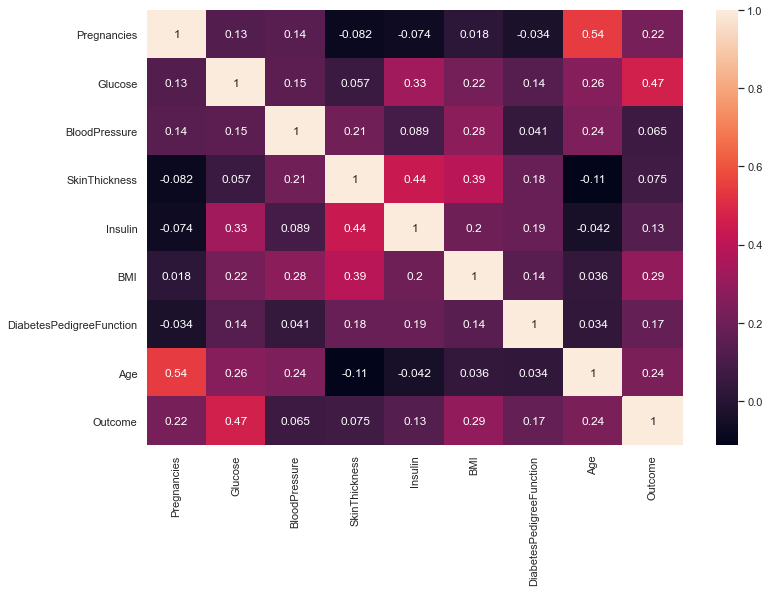

In [11]:
import seaborn as sns
sns.heatmap(corr,annot=True)
sns.set(rc={'figure.figsize':(15,15)})

In [12]:
print(corr['Outcome'])

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64


## Data Preprocessing

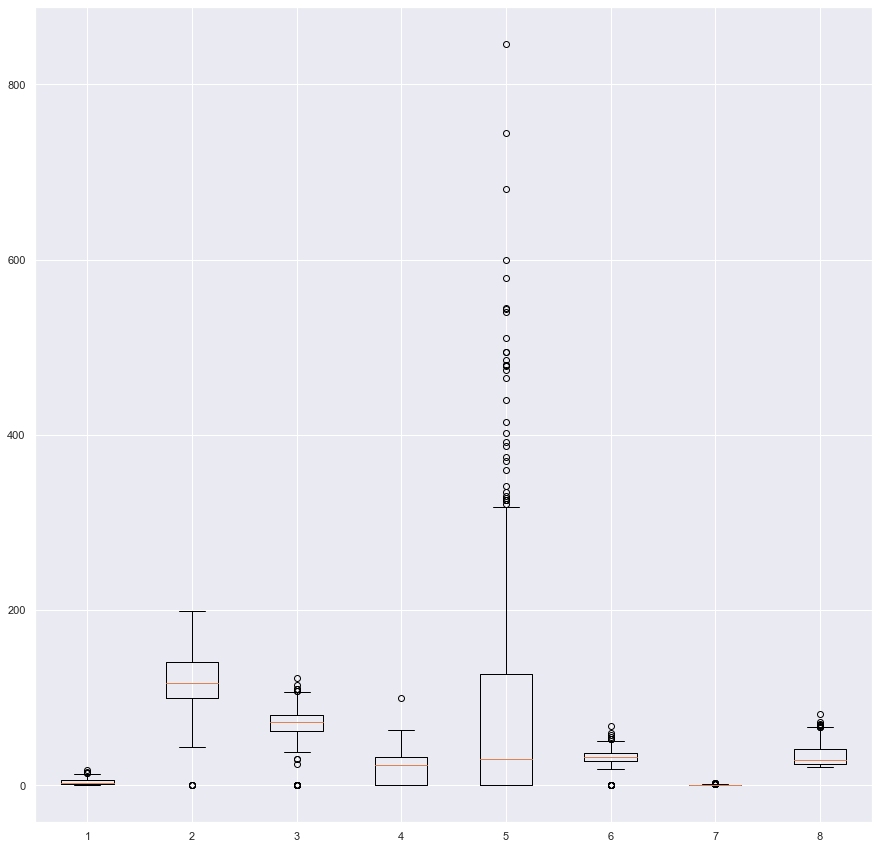

In [13]:
plt.boxplot(df.drop('Outcome',axis=1))

plt.show()

### Removing outliers

In [14]:
list = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
for i in list:
    
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range. 

    filter = (df[i] >= Q1 - 1.5 * IQR) & (df[i] <= Q3 + 1.5 *IQR)
    df = df.loc[filter]  

In [15]:
df.shape

(636, 9)

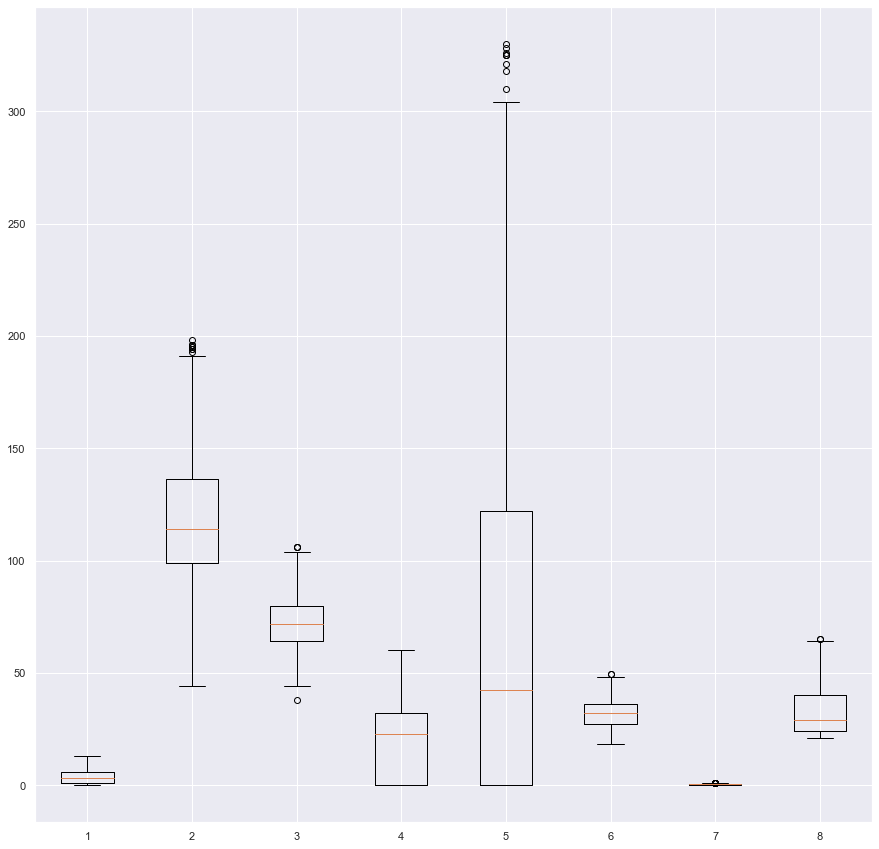

In [16]:
plt.boxplot(df.drop('Outcome',axis=1))

plt.show()

In [17]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']

### Standardization

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
X_scaled

array([[ 6.81425557e-01,  1.00540261e+00, -6.96199653e-04, ...,
         2.56438414e-01,  8.19790711e-01,  1.60468837e+00],
       [-8.57589551e-01, -1.16896300e+00, -5.32035774e-01, ...,
        -8.40893209e-01, -3.07223286e-01, -1.43040721e-01],
       [ 1.29703160e+00,  2.21338350e+00, -7.09148966e-01, ...,
        -1.35820669e+00,  1.00354299e+00, -5.10549792e-02],
       ...,
       [ 3.73622536e-01,  7.35316313e-02, -6.96199653e-04, ...,
        -9.03597873e-01, -7.40061995e-01, -2.35026462e-01],
       [-8.57589551e-01,  2.46100331e-01, -1.06337535e+00, ...,
        -2.92227397e-01, -3.15390054e-01,  1.32873114e+00],
       [-8.57589551e-01, -8.92853085e-01, -1.77809391e-01, ...,
        -2.45198899e-01, -4.54225112e-01, -8.78926652e-01]])

## Splitting Data

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y)

In [22]:
X_train.shape

(508, 8)

In [23]:
y_test.shape

(128,)

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [25]:
score = cross_val_score(DecisionTreeClassifier(),X,y,cv=5)
score

array([0.71875   , 0.63779528, 0.72440945, 0.75590551, 0.67716535])

In [26]:
score.mean()

0.7028051181102363

## Bagging

In [27]:
from sklearn.ensemble import BaggingClassifier

In [28]:
bagclf = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=50,
    max_samples=0.8, 
    oob_score=True, #out of bag samples
    random_state=0
)
bagclf.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=50, oob_score=True, random_state=0)

In [29]:
bagclf.oob_score_

0.7559055118110236

In [30]:
bagclf.score(X_test,y_test)

0.7890625

In [31]:
cv_score = cross_val_score(bagclf,X,y,cv=5)
cv_score

array([0.75      , 0.74015748, 0.77165354, 0.81102362, 0.77952756])

In [32]:
cv_score.mean()

0.7704724409448819